# Random Forest 
 - 분류 예측 기법 중 하나

## Concept
 - Tree를 기반으로 한다. 
<img src="photo/1.PNG">

## Algorithm
<img src="photo/2.PNG">

## pros & cons
 - **숲의 크기(나무의 수)가 커질수록 일반화 오류가 특정 값으로 수렴하게되어 over-fitting을 피할 수 있음**
  - Decision Tree의 경우 Over fitting의 위험성이 높다. 
 - 전체 학습용 데이터에서 **무작위로 복원 추출된 데이터**를 사용함으로써 잡음이나 outlier로부터 크게 영향을 받지 않음
 - 분석가가 입력변수 선정으로부터 자유로울 수 있음
 - Class의 빈도가 불균형일 경우 타 기법에 비해 우수한 예측력을 보임
 - 최종 결과에 대한 해석이 어려움
  - Too many trees 
  - 성능이 중요한 요소이다 Random Forest의 경우 

## considered heuristics
<img src="photo/3.PNG">

In [3]:
library(randomForest)
library(caret)
library(ROCR)

In [4]:
cb <- read.delim("../1022_Decision Tree_2/Hshopping.txt", stringsAsFactors=FALSE)
colnames(cb) <- c("ID","SEX","AGE","AMT","STAR","REFUND") # Jupyter note Font Error using Korean
cb$REFUND <- factor(cb$REFUND)

 - Sampling

In [5]:
set.seed(1)
inTrain <- createDataPartition(y=cb$REFUND, p=0.6, list=FALSE)
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]
nrow(cb.train)
nrow(cb)

[1] 301

[1] 500

 - 50개의 Tree생성. 
 - 트리 개수는 ntree, 가지를 칠 때 고려할 변수의 갯수는 mtry로 각각 정한다.
 - OOB(Out of Bag Sample) estimate of  error rate: 9.3% -> 50개 트리 오류의 평균

In [6]:
set.seed(123)
rf_model <- randomForest(REFUND ~. -ID, data=cb.train, ntree = 50, mtry=2)
rf_model


Call:
 randomForest(formula = REFUND ~ . - ID, data = cb.train, ntree = 50,      mtry = 2) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 2

        OOB estimate of  error rate: 9.3%
Confusion matrix:
    0  1 class.error
0 193 14  0.06763285
1  14 80  0.14893617

 - Green : Worst
 - Black : Overall
 - Red : Best

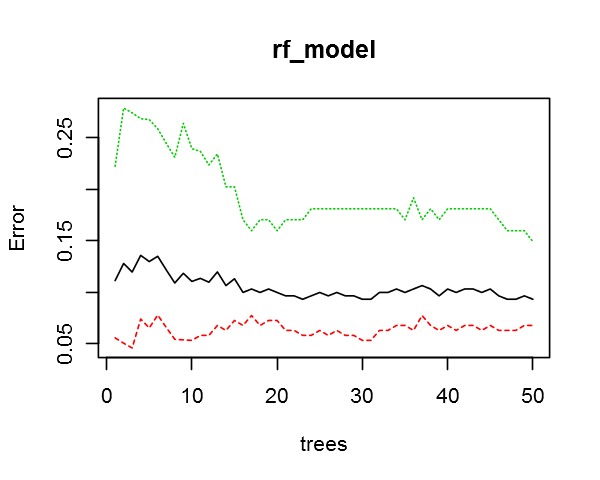

In [22]:
options(repr.plot.width=5, repr.plot.height=4)
plot(rf_model)

In [23]:
importance(rf_model) #중요도 퍼센트로 표현.

,MeanDecreaseGini
SEX,7.648143
AGE,65.86487
AMT,17.42125
STAR,18.22529


 - 엔트로피 값은 경우 엔트로피 값이 높으면 불순 낮으면 순수 
 - Gini 도 엔트로피가 동일하다.
 - Gini값이 높을 수록 영향도가 높다. 

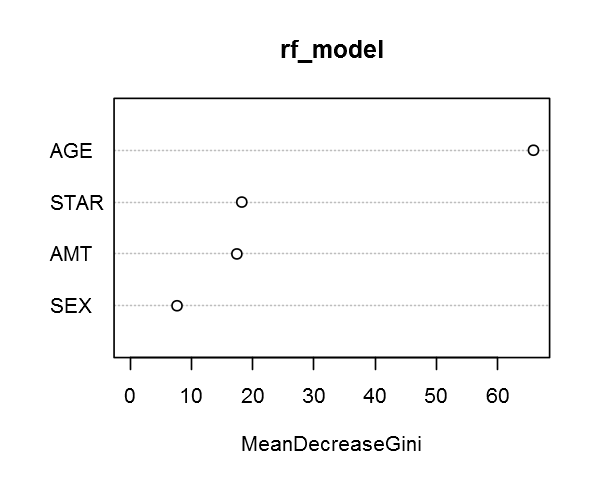

In [25]:
varImpPlot(rf_model)

In [26]:
cb.test$rf_pred <- predict(rf_model, cb.test, type="response")
confusionMatrix(cb.test$rf_pred, cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 125  11
         1  12  51
                                          
               Accuracy : 0.8844          
                 95% CI : (0.8316, 0.9253)
    No Information Rate : 0.6884          
    P-Value [Acc > NIR] : 7.026e-11       
                                          
                  Kappa : 0.7318          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9124          
            Specificity : 0.8226          
         Pos Pred Value : 0.9191          
         Neg Pred Value : 0.8095          
             Prevalence : 0.6884          
         Detection Rate : 0.6281          
   Detection Prevalence : 0.6834          
      Balanced Accuracy : 0.8675          
                                          
       'Positive' Class : 0               
                                          

In [27]:
cb.test$rf_pred_prob <- predict(rf_model, cb.test, type="prob")
rf_pred <- prediction(cb.test$rf_pred_prob[,2],cb.test$REFUND)
rf_model.perf1 <- performance(rf_pred, "tpr", "fpr") # ROC-chart
rf_model.perf2 <- performance(rf_pred, "lift", "rpp")

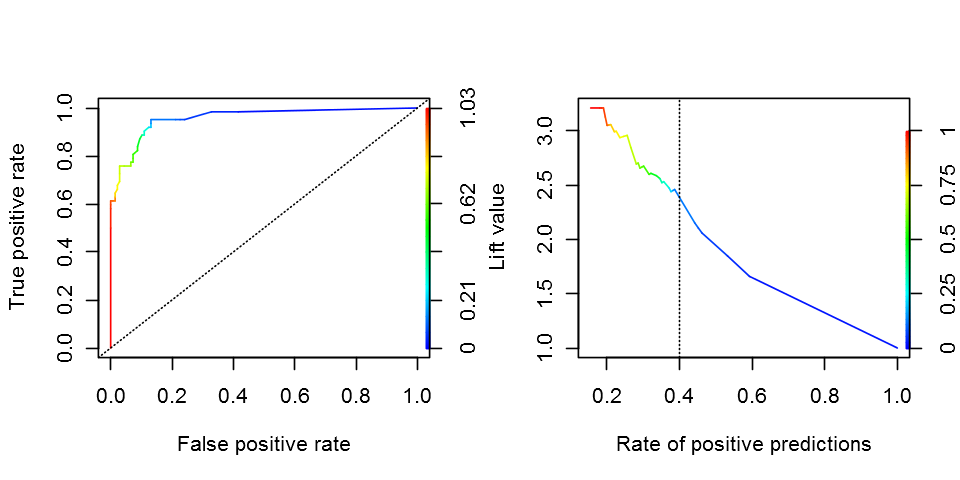

In [31]:
options(repr.plot.width=8, repr.plot.height=4)
par(mfrow=c(1,2))
plot(rf_model.perf1, colorize=TRUE); abline(a=0, b=1, lty=3)
plot(rf_model.perf2, colorize=TRUE); abline(v=0.4, lty=3)

 - AUC : Area under the ROC curve.

In [32]:
performance(rf_pred, "auc")@y.values[[1]]

[1] 0.9574405